In [15]:
#Importando as bibliotecas
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pandas_profiling

%matplotlib inline

In [2]:
#Importando o arquivo: supermarket_sales.csv

df = pd.read_csv('../bases/supermarket_sales.csv')

In [3]:
#Head de df
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
#Vejamos o shape
df.shape

(1000, 17)

In [5]:
#Total de registros por colunas
df.count()

Invoice ID                 1000
Branch                     1000
City                       1000
Customer type              1000
Gender                     1000
Product line               1000
Unit price                 1000
Quantity                   1000
Tax 5%                     1000
Total                      1000
Date                       1000
Time                       1000
Payment                    1000
cogs                       1000
gross margin percentage    1000
gross income               1000
Rating                     1000
dtype: int64

In [6]:
#Tipo de dados de cada coluna
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [7]:
#Principais medidas estatísticas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,2.649463e+01,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431e+00,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,2.458853e+02,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,2.341765e+02,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,6.131498e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580e+00,4.000000,5.500000,7.000000,8.500000,10.000000


In [12]:
#Data Profiling
profile = pandas_profiling.ProfileReport(df)
#profile

Agora, através do uso da Análise Bivariada, tentaremos responder uma série de questões empresariais.


####  1. A receita bruta afeta as classificações fornecidas pelos clientes?

Podemos usar o gráfico de dispersão para responder a esta pergunta.

<AxesSubplot:xlabel='Rating', ylabel='gross income'>

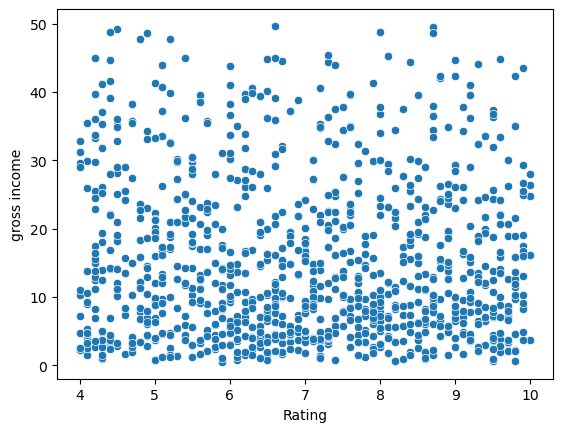

In [16]:
sns.scatterplot(df,x='Rating', y='gross income')


**Resposta**: Como você pode ver no gráfico de dispersão, não há relação entre a receita bruta de um cliente e sua classificação.

#### 2. Qual ramo é mais lucrativo?

<AxesSubplot:xlabel='Branch', ylabel='gross income'>

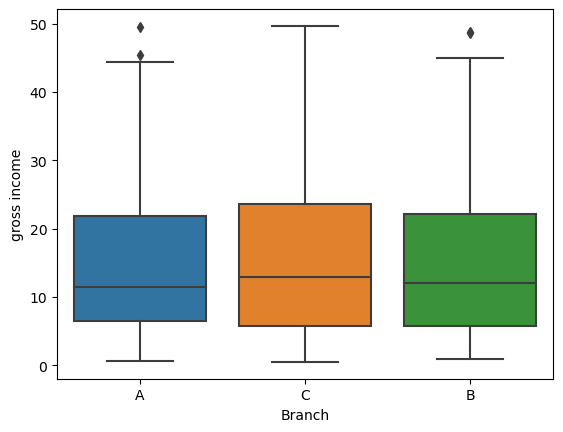

In [17]:
sns.boxplot(x=df['Branch'], y=df['gross income'])

**Resposta**: Não há muita diferença na receita bruta por agência em nível médio. A Filial C tem receitas ligeiramente superiores às de A ou B. Conforme observado acima, embora a Filial A tenha vendas ligeiramente superiores às restantes, C, ou seja, Naypyitaw é a filial mais lucrativa em termos de receita bruta.

#### 3. Existe alguma relação entre género e rendimento bruto?

Semelhante à análise anterior, podemos usar um box plot para responder a esta pergunta.

<AxesSubplot:xlabel='Gender', ylabel='gross income'>

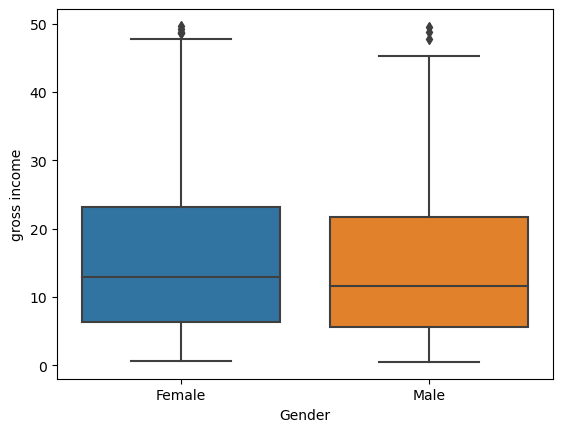

In [18]:
sns.boxplot(x=df['Gender'], y=df['gross income'])

**Resposta** : O rendimento bruto é semelhante tanto para homens como para mulheres, embora as clientes do sexo feminino gastem um pouco mais no percentil 75.

#### 4. Qual linha de produtos gera mais receita?

<AxesSubplot:xlabel='Product line', ylabel='gross income'>

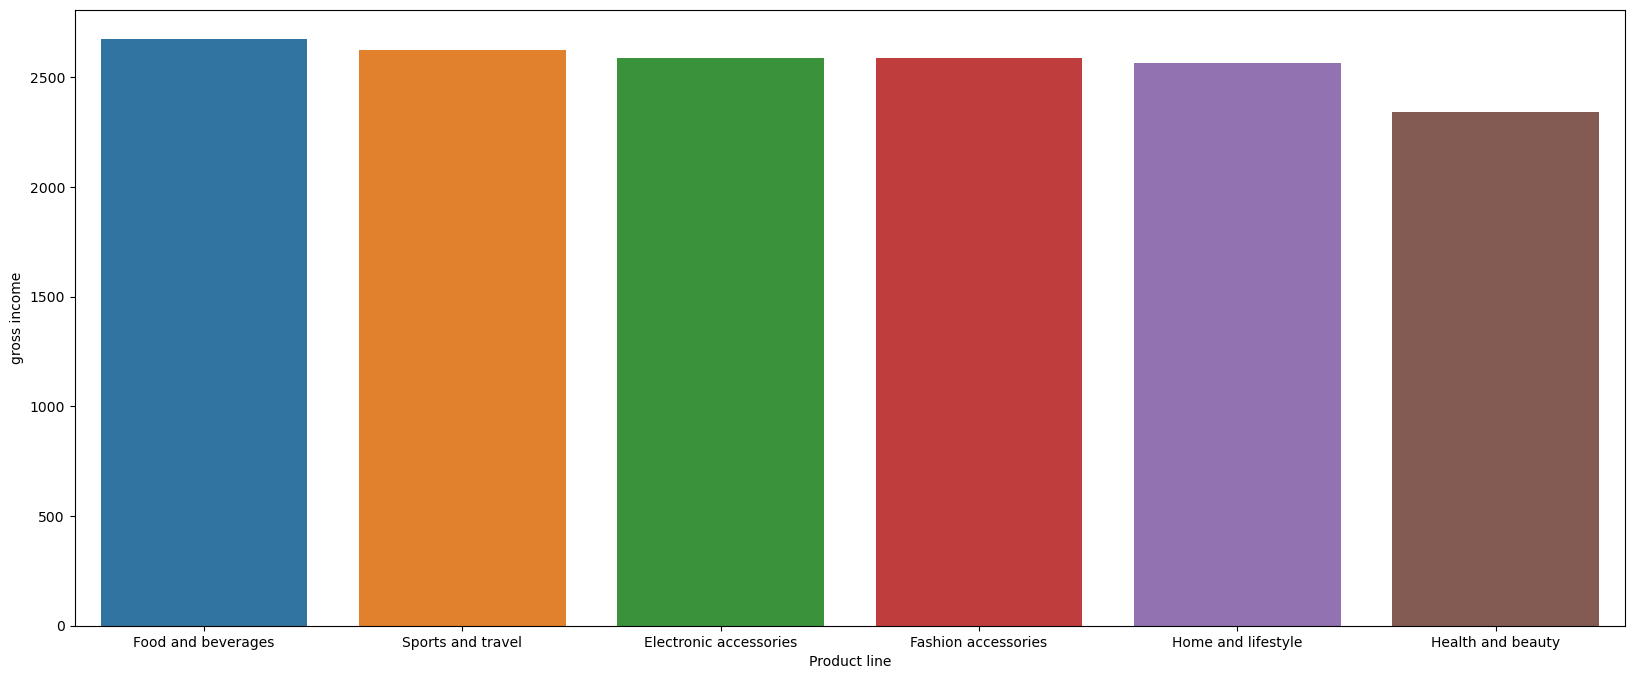

In [19]:
cat = df[["Product line", "gross income"]].groupby(['Product line'], as_index=False).sum().sort_values(by='gross income', ascending=False)

plt.figure(figsize=(20,8))

sns.barplot(x='Product line', y='gross income', data=cat)

**Resposta** : A renda bruta é mais alta em alimentos e bebidas.